# GDG&WTM Challengese
This notebook is for the `EDA` challenge for <b>Devfest 2022</b>

### Importing packages and data
Packages used :<br>
- Pandas
- NumPy
- Matplotlib
- Seaborn

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import warnings 
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("indemnity.csv")

In [3]:
data.head()

,age,gender,Body mass index,kids,chronic illness,area,bills
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Digging into the data

<br>This is a function I use to summarize information about my data :

In [4]:
def summary(data) : 
    """ 
    It takes as an argument pandas dataframe 
    It creates a summary about missing values 
    """
    result = (pd.DataFrame(data.dtypes, columns=["Data Type"])
              .reset_index().rename(columns={'index': 'Column'}))
    result["Unique"] = data.nunique().values
    result["Null"] = data.isna().sum().values
    result["%null"] = np.round(data.isna().sum().values 
                               /data.shape[0] * 100, decimals=2)
    return result

In [5]:
summary(data)

,Column,Data Type,Unique,Null,%null
0,age,int64,47,0,0.0
1,gender,object,2,0,0.0
2,Body mass index,float64,548,0,0.0
3,kids,int64,6,0,0.0
4,chronic illness,object,2,0,0.0
5,area,object,4,0,0.0
6,bills,float64,1337,0,0.0


The data is quite clean (There is no missing data)

### Visualisations

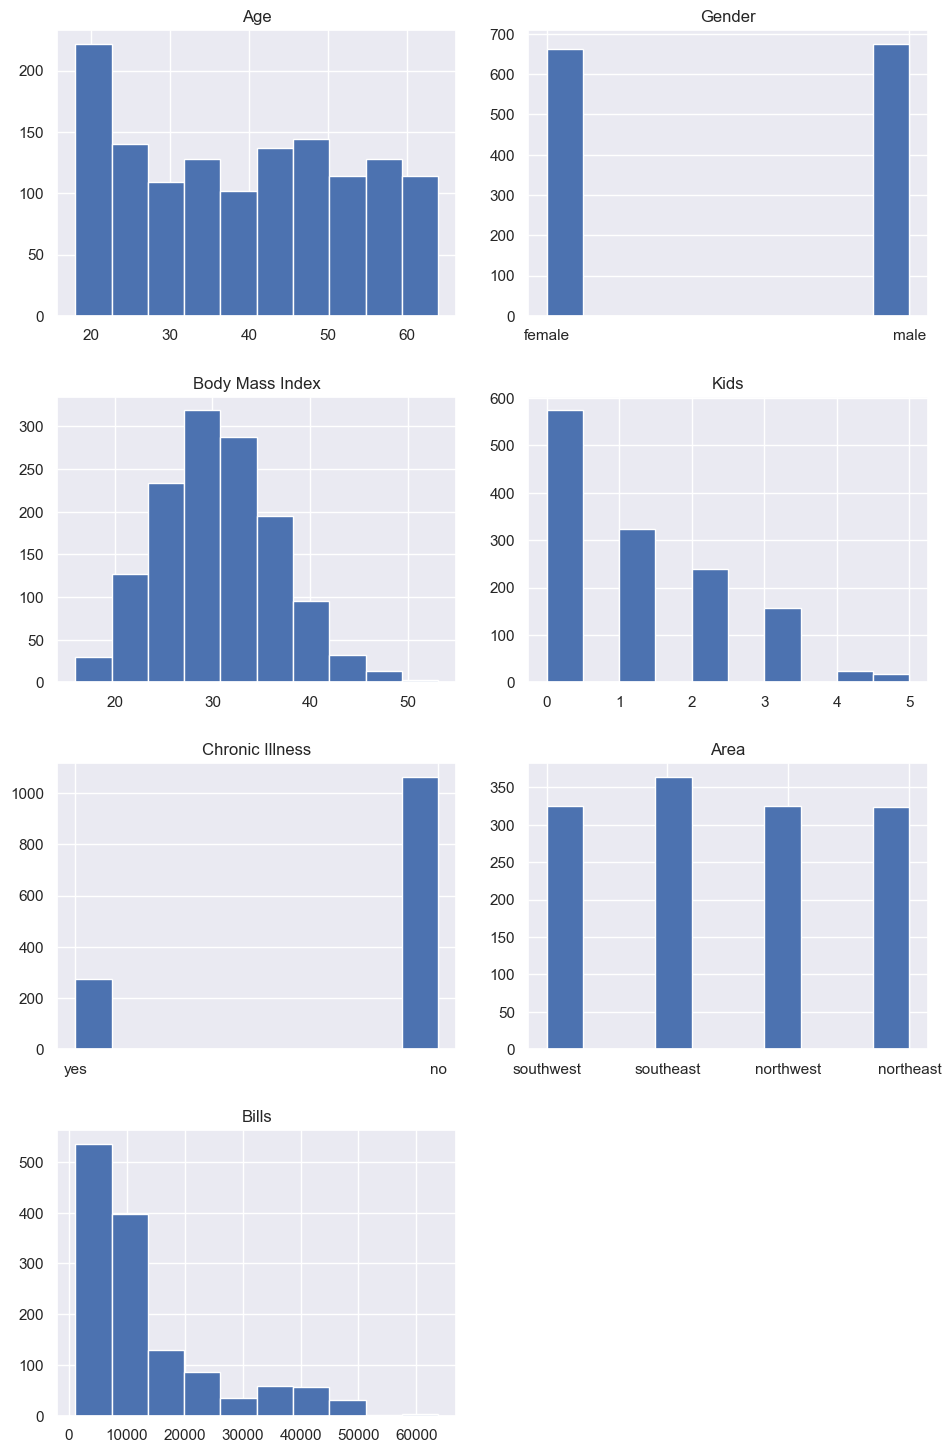

In [6]:
fig=plt.figure(figsize=(10, 15))
columns = data.columns
for i in range(7):
    column = columns[i]
    fig.add_subplot(4,2,i+1)
    plt.hist(data=data, x=column)
    plt.title(column.title())
fig.tight_layout(pad=2)
plt.show()

##### Box plots

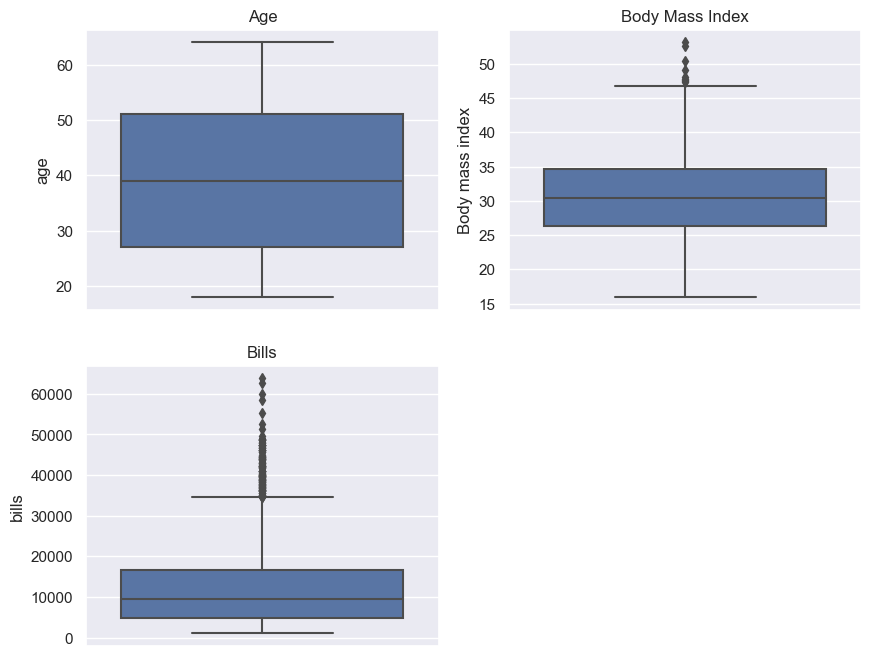

In [7]:
columns1 = ["age", "Body mass index", "bills"]
fig=plt.figure(figsize=(10, 8))
for i in range(len(columns1)):
    column = columns1[i]
    fig.add_subplot(2,2,i+1)
    sns.boxplot(y=data[column])
    plt.title(column.title())
plt.show()

##### Distributions

In [8]:
data["age_intervals"] = pd.cut(data["age"], 
                   bins=[0, 20, 40, 60, 80], 
                   labels=['0-20', '20-40', '40-60', '60-80'],
                   include_lowest=True)
data["bmi_intervals"] = pd.cut(data["Body mass index"], 
                   bins=[0, 20, 40, 60], 
                   labels=['0-20', '20-40', '40-60'],
                   include_lowest=True)

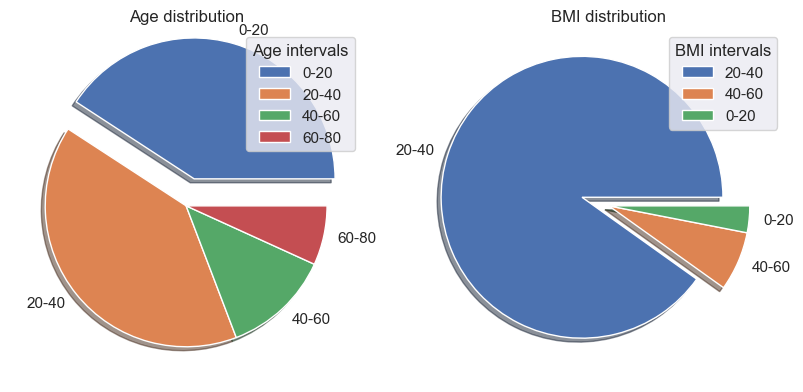

In [9]:
fig=plt.figure(figsize=(10, 5))
fig.add_subplot(1,2,1)
plt.pie(data['age_intervals'].value_counts(), 
        labels = data['age_intervals'].unique(), 
        explode = [0.2, 0, 0, 0], 
        shadow = True)
plt.legend(title="Age intervals")
plt.title("Age distribution")

fig.add_subplot(1,2,2)
plt.pie(data['bmi_intervals'].value_counts(), 
        labels = data['bmi_intervals'].unique(), 
        explode = [0.2, 0, 0], 
        shadow = True)
plt.legend(title="BMI intervals")
plt.title("BMI distribution")

plt.show()

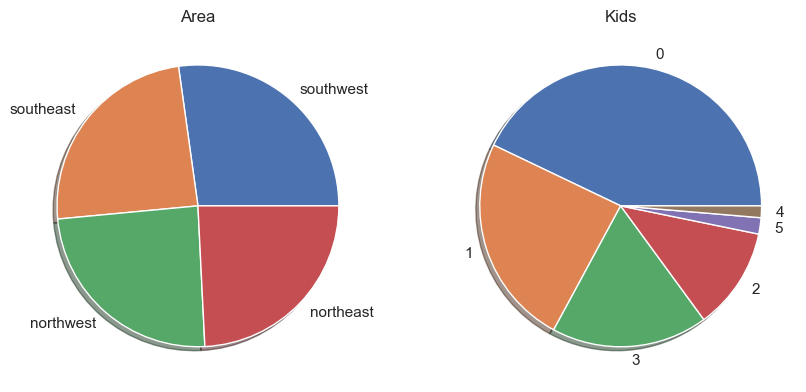

In [10]:
columns2 = ["area", "kids"]
fig=plt.figure(figsize=(10, 5))
for i in range(len(columns2)):
    column = columns2[i]
    fig.add_subplot(1,2,i+1)
    plt.pie(data[column].value_counts(), 
        labels = data[column].unique(),
        shadow = True)
    plt.title(column.title())
plt.show()

##### Comparaison of illness in relation to other features 

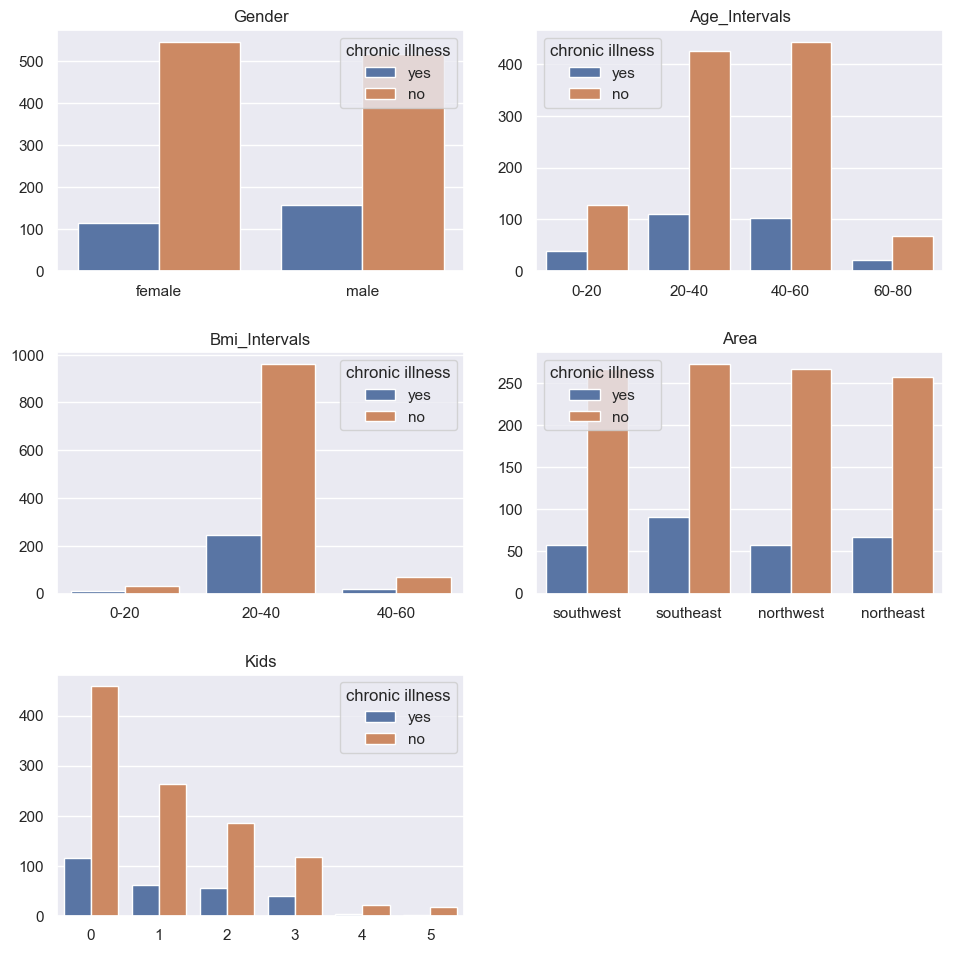

In [11]:
columns3 = ["gender", "age_intervals", "bmi_intervals", "area", "kids"]
fig=plt.figure(figsize=(10, 10))
for i in range(len(columns3)):
    column = columns3[i]
    fig.add_subplot(3,2,i+1)
    sns.countplot(data=data, x=column, hue="chronic illness")
    plt.xlabel("")
    plt.ylabel("")
    plt.title(column.title())
fig.tight_layout(pad=2)
plt.show()

We can easily see that there are some factors that looks correlated to illness.<br>
From this data we can say that men and old people are more `likely` to get a chronic illness.